# Input Parameters

In [1]:
#source ISvenv/bin/activate (launching and exiting the virtual environment containing the required modules, stored in the working directory)
#ISvenv/bin/python your_script.py - for running a script in the virtual environment
#source deactivate - to deactivate the virtual environment

#import all the libraries needed
from import_dep import *

# import the class that imports the IS data
from IS_Import import ISdata, ImpedanceData, AgilentIS, SolatronIS, KeithleyIS
from IS_Functions import IS_plot, IS_plot_fit, run_to_dict, update_plot_string, extract_single_dc
from IS_Circuit_Fitting import *
from IS_Debye_Fitting import *


# import custom plot style and colorbar functions
from plot_style import set_plot_style, add_slide

# Define the path to the root directory containing the IS Data 
root_IS_Agilent = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Groningen'
root_IS_solatron = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Solatron/Combined_Analysis'
root_IS_Keithley = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Keithley/Teddy Impedance 1'

# Define the path to the output directory to save the data
output_IS_Keithley = '/Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Keithley/Teddy Impedance 1/test/Output'

# Export settings
fig_format = 'svg' # format of the figure to be saved
plot_transparency = True # set to True to export plots with transparency
export_data = False # set to True to export the data to figures and a powerpoint presentation and save to path_out
powerpoint_string = 'UCL52A' # string added to end of powerpoint filename
fig_list = [] # Create a list to flexibly store tuples with the (figure, filename, title) for later exporting


# Custom Scence style settings for figures which returns a figure size to pass to plotting functions if needed
fig_size = set_plot_style(export_data = export_data, use_tex=True)
#plt.style.use(['science', 'grid', 'nature'])




# Capacitance Approximations

In [18]:
e = scipy.constants.epsilon_0  # epsilon_0 constant in F/m (Farads per meter)
C_calc_siox = (e*4*(800e-6)**2)/(35e-9)
print("C_siox", C_calc_siox)

C_calc_Ti = (e*80*(800e-6)**2)/(5e-9)
print("C_Ti", C_calc_Ti)

#print("formed",(8.854e-12*40*(20e-6)**2)/(1e-9) )



C_siox 6.476205947465143e-10
C_Ti 9.0666883264512e-08


# Import All Data
- This stores a class object which contains the data in "measurements"
- "measurements" is a dictionary with a key: and a ISdata object containing impedance data
- e.g. print(dev_J.measurements.keys())
- measurements is an iter object so "for measurements in dev_J" loops over the ISdata objects in the dict
- measurements also has a __getitem__ meaning that dev_J[0] indexes the first item in the dict (the first ISdata object)

- Here I am using run_to_dict to put all data into a dict where dict[6] contains a list of all the run 6 data

In [ ]:
Vacuum_capacitance = 8.854e-12 * ((20e-6)**2) / (30e-9)  # Vacuum capacitance, used for permittivity calculations
#import all keithley data from combined folder
all_data_keithley = KeithleyIS(root_IS_Keithley, 'test', )

# loop through the imported data and put all measurements with the same run number into a list
# With each list containing the data for a single run put into a dictionary
keithley = run_to_dict(all_data_keithley)

Loading Keithley data from: /Users/horatiocox/Desktop/RUG_postdoc/UCL PostDoc/Experiments/Keithley/Teddy Impedance 1/test/FrequencySweep_Mass.xls
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Loaded run 444 from sheet 'Run444' with 4096 points.
Sheet Calc has fewer than 4 columns, skipping.
Sheet Settings has fewer than 4 columns, skipping.
Loaded run 443 from sheet 'Run443' with 4096 points.
Loaded run 442 from sheet 'Run442' with 4096 points.
Loaded run 441 from sheet 'Run441' with 4096 points.
Loaded run 440 from sheet 'Run440' with 4096 points.
Loaded run 439 from sheet 'Run439' with 4096 points.
Loaded run 438 from sheet 'Run438' with 4096 points.
Loaded run 437 from sheet 'Run437' with 4096 points.
Loaded run 436 from sheet 'Run436' with 4096 points.
Loaded run 435 from sheet 'Run435' with 4096 points.
Loaded run 434 from sheet 'Run434' with 4096 points.
Loaded run 433 from sheet 'Run433' with 4096 points.
Loaded run 432 from sheet 'Run432' with 4096 po

In [4]:
print(all_data_keithley.measurements[1].run_number)
print(keithley.keys())
print(keithley[429][0].DC_offset)

443
dict_keys([444, 443, 442, 441, 440, 439, 438, 437, 436, 435, 434, 433, 432, 431, 430, 429, 428, 427, 426, 425, 424, 423, 422, 421, 420, 419, 418])
0.0


# Device 1: C3A2B1
- Overformed and damaged so couldn't be RESET

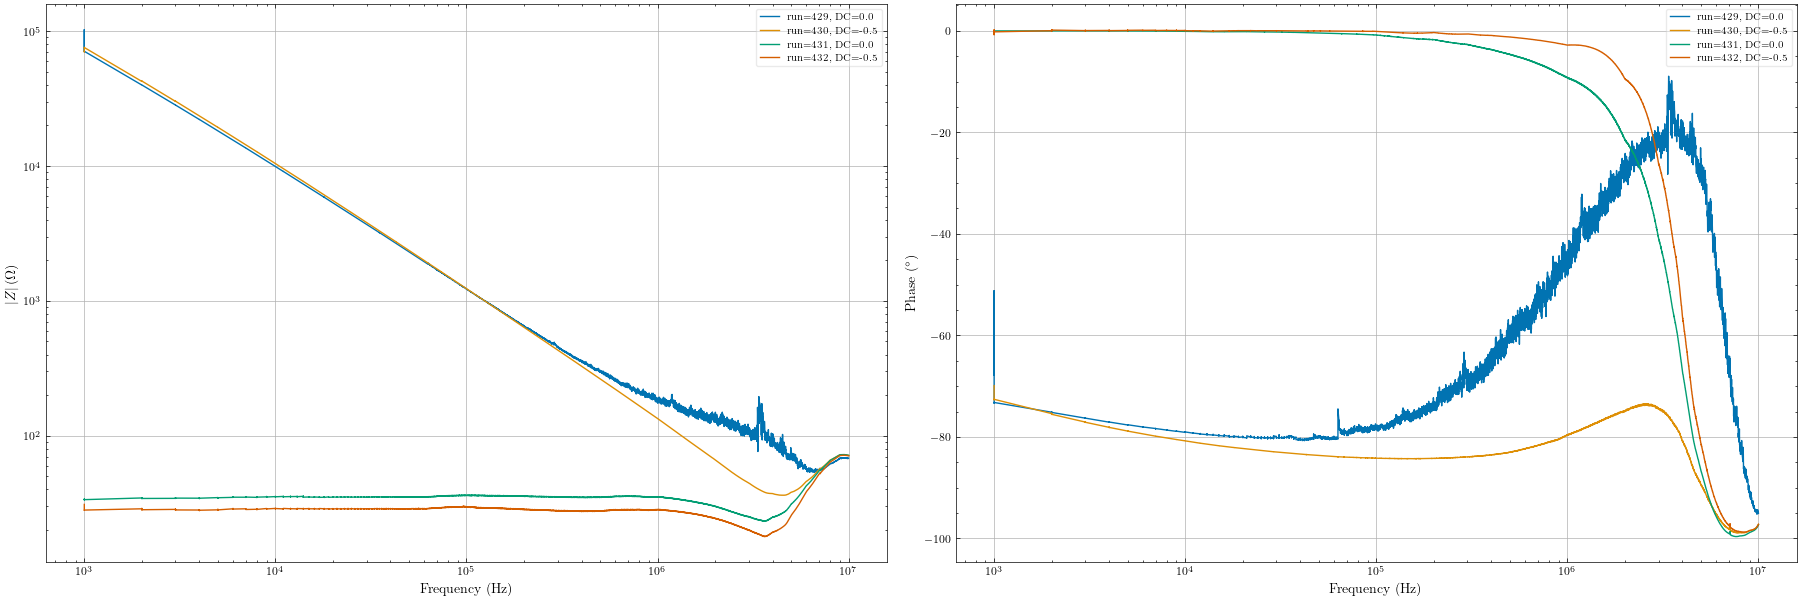

In [5]:
# Select data 
d1 = [keithley[429][0], keithley[430][0], keithley[431][0], keithley[432][0]]
# extract a single DC level from the data
#d5 = extract_single_dc(d5, DC_val=-0.8)

# Labels
plot_labels = ['pristine'] # label for the legend
plot_filename = 'dev1' # name for exported figure
plot_title = 'D1: Form and Switch' # title for powerpoint

# Notes
notes = ['device:c3a2b1, overformed and damaged so could not be RESET '] # notes for the powerpoint in text box

# if export true, update the plot string
d1 = update_plot_string(d1, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d1, d_type='Zabsphi', freq_lim=[1e1, 1e7],
                    sort_data=False, c_bar=0, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

# Device 2: C3A2A2
-

## Plotting Raw Data

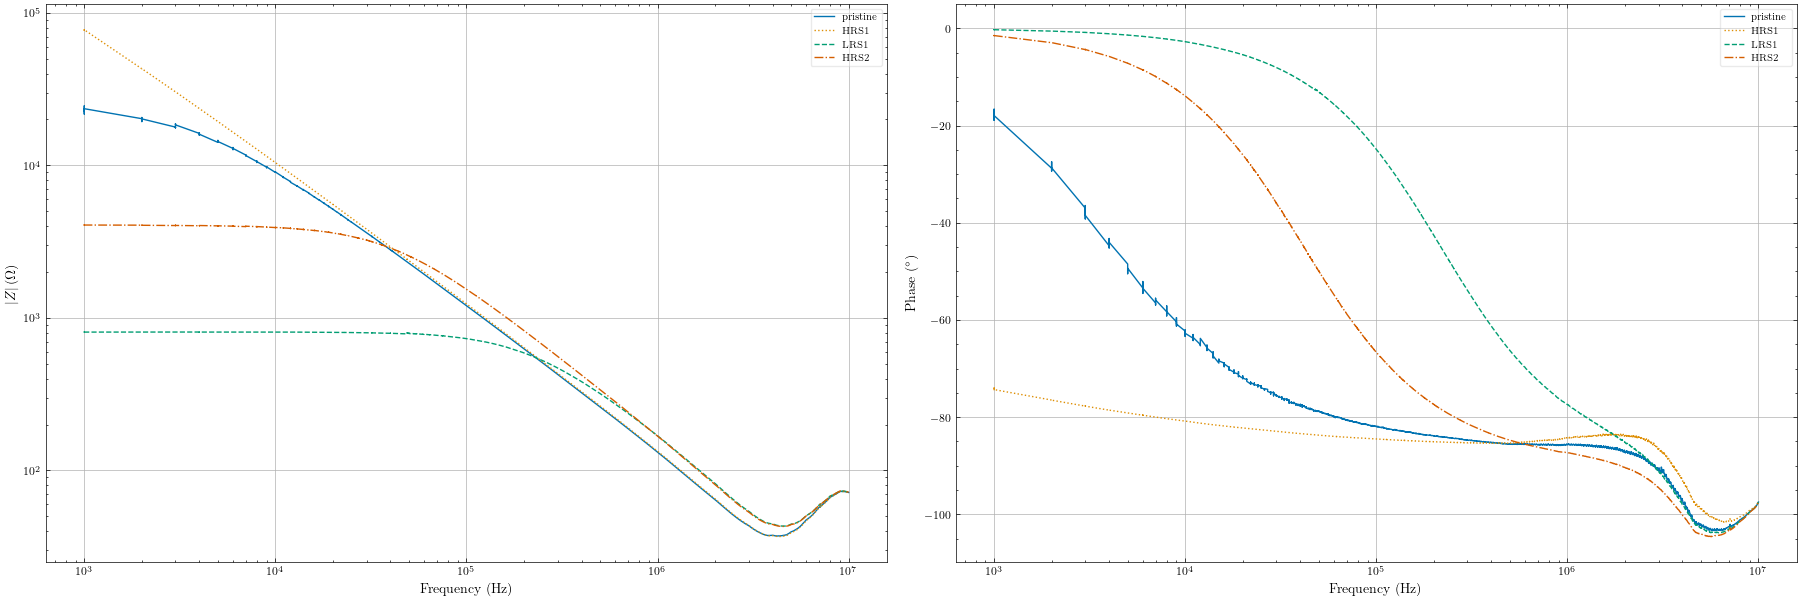

In [6]:
# Select data 
d2 = [[keithley[435][0]], [keithley[436][0]], [keithley[439][0]], [keithley[440][0]], [keithley[441][0]], [keithley[442][0]], [keithley[443][0]], [keithley[444][0]]]
# extract a single DC level from the data
d2 = extract_single_dc(d2, DC_val=0)


# Labels
plot_labels = ['pristine', 'pristine', 'HRS1', 'HRS1', 'LRS1', 'LRS1', 'HRS2', 'HRS2'] # label for the legend
plot_labels = plot_labels[0::2] # slice every second element to match the data structure

plot_filename = 'dev2' # name for exported figure
plot_title = 'D2: Form and Switch' # title for powerpoint

# Notes
notes = ['device:C3A2A2, '] # notes for the powerpoint in text box

# if export true, update the plot string
d2 = update_plot_string(d2, export_data=True, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot(d2, d_type='Zabsphi', freq_lim=[1e1, 1e7],
                    sort_data=False, c_bar=4, fig_size=fig_size, med_filt = 1, force_key = False)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes)) 

# Single RC Fit

## Fitting


--- Starting Fit for: pristine ---
Using model: RC
With fixed params: {'C_pad': 0.0, 'R_series': np.float64(10.0)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1']
3072 pts post-freq filter.
Running DE...
DE OK.
 DE Final Cost: 4.3688e+01
  DE Best:)
name R_mem1: 2.21e+04
name C_mem1: 1.40e-09

Running LS Refinement...
LS OK!
  LS Final Cost: 21.844
  Final Fitted Parameters:
    R_mem1: 22143.199
    C_mem1: 0.000
    C_pad: 0.000
    R_series: 10.000


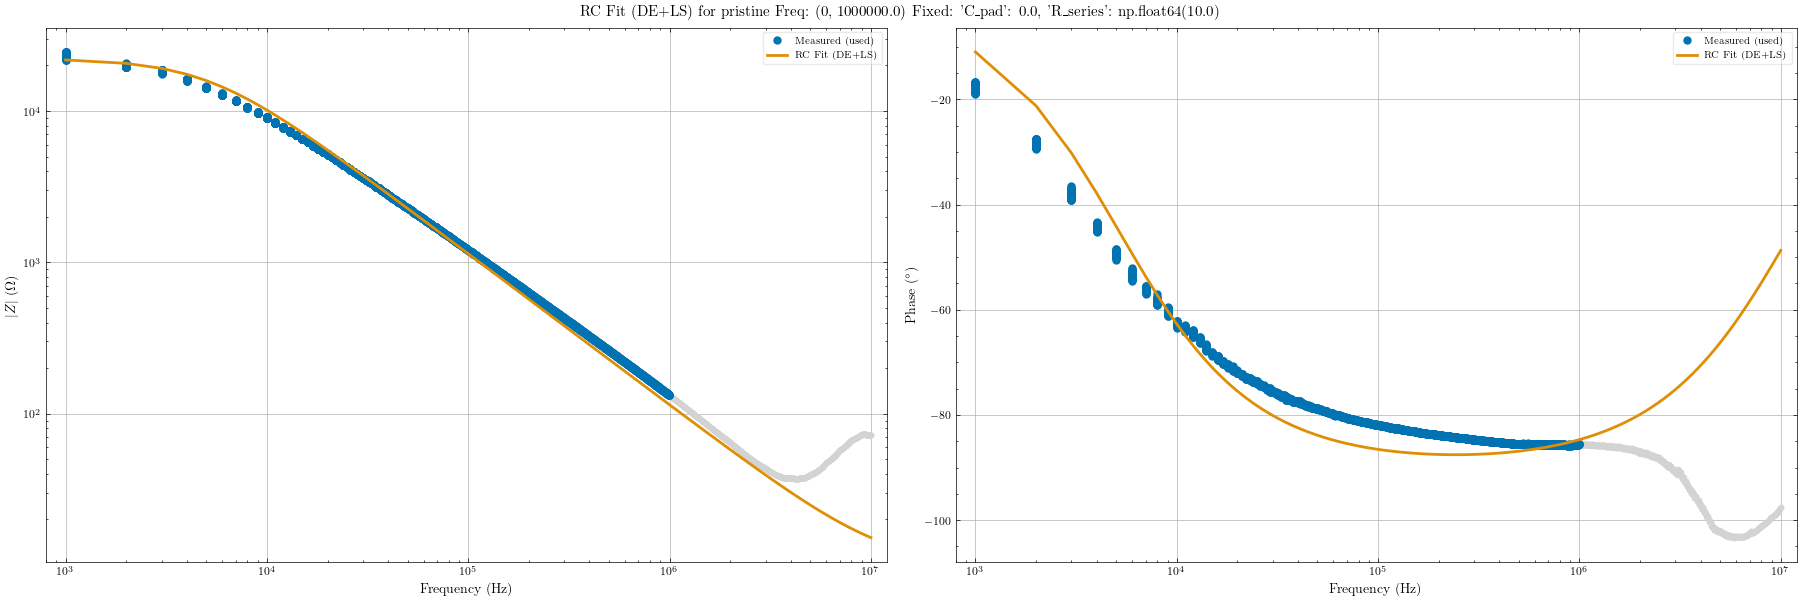


Final Fitted Parameters Dictionary:
{'C_pad': 0.0, 'R_series': np.float64(10.0), 'R_mem1': np.float64(22143.19860267639), 'C_mem1': np.float64(1.3962000274660676e-09)}
--- Fit finished for: pristine ---

--- Starting Fit for: HRS1 ---
Using model: RC
With fixed params: {'C_pad': 0.0, 'R_series': np.float64(10.0)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1']
3072 pts post-freq filter.
Running DE...
DE OK.
 DE Final Cost: 1.0029e+02
  DE Best:)
name R_mem1: 2.11e+05
name C_mem1: 1.49e-09

Running LS Refinement...
LS OK!
  LS Final Cost: 50.145
  Final Fitted Parameters:
    R_mem1: 211132.559
    C_mem1: 0.000
    C_pad: 0.000
    R_series: 10.000


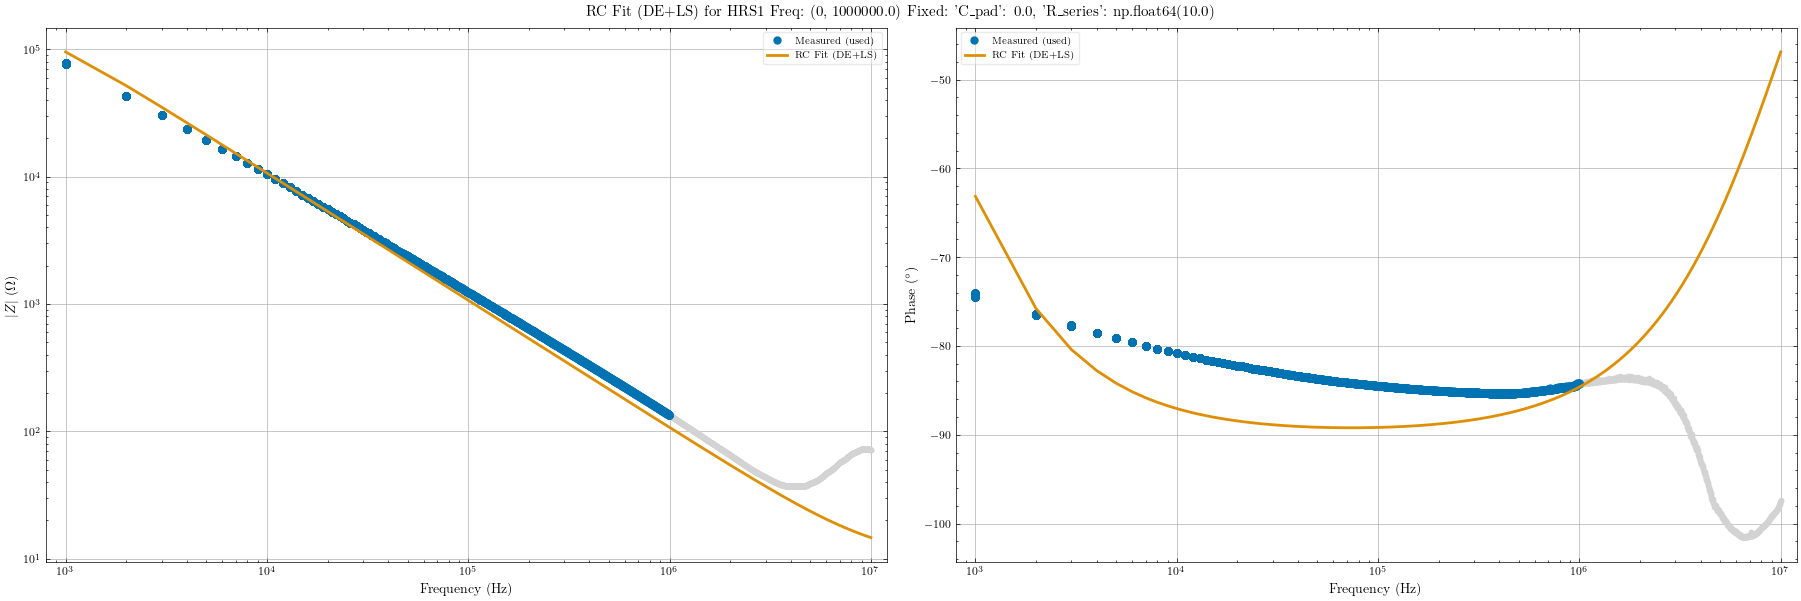


Final Fitted Parameters Dictionary:
{'C_pad': 0.0, 'R_series': np.float64(10.0), 'R_mem1': np.float64(211132.5587234497), 'C_mem1': np.float64(1.4897419429567751e-09)}
--- Fit finished for: HRS1 ---

--- Starting Fit for: LRS1 ---
Using model: RC
With fixed params: {'C_pad': 0.0, 'R_series': np.float64(10.0)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1']
3072 pts post-freq filter.
Running DE...
DE OK.
 DE Final Cost: 3.6611e-01
  DE Best:)
name R_mem1: 8.00e+02
name C_mem1: 9.37e-10

Running LS Refinement...
LS OK!
  LS Final Cost: 0.183
  Final Fitted Parameters:
    R_mem1: 800.253
    C_mem1: 0.000
    C_pad: 0.000
    R_series: 10.000


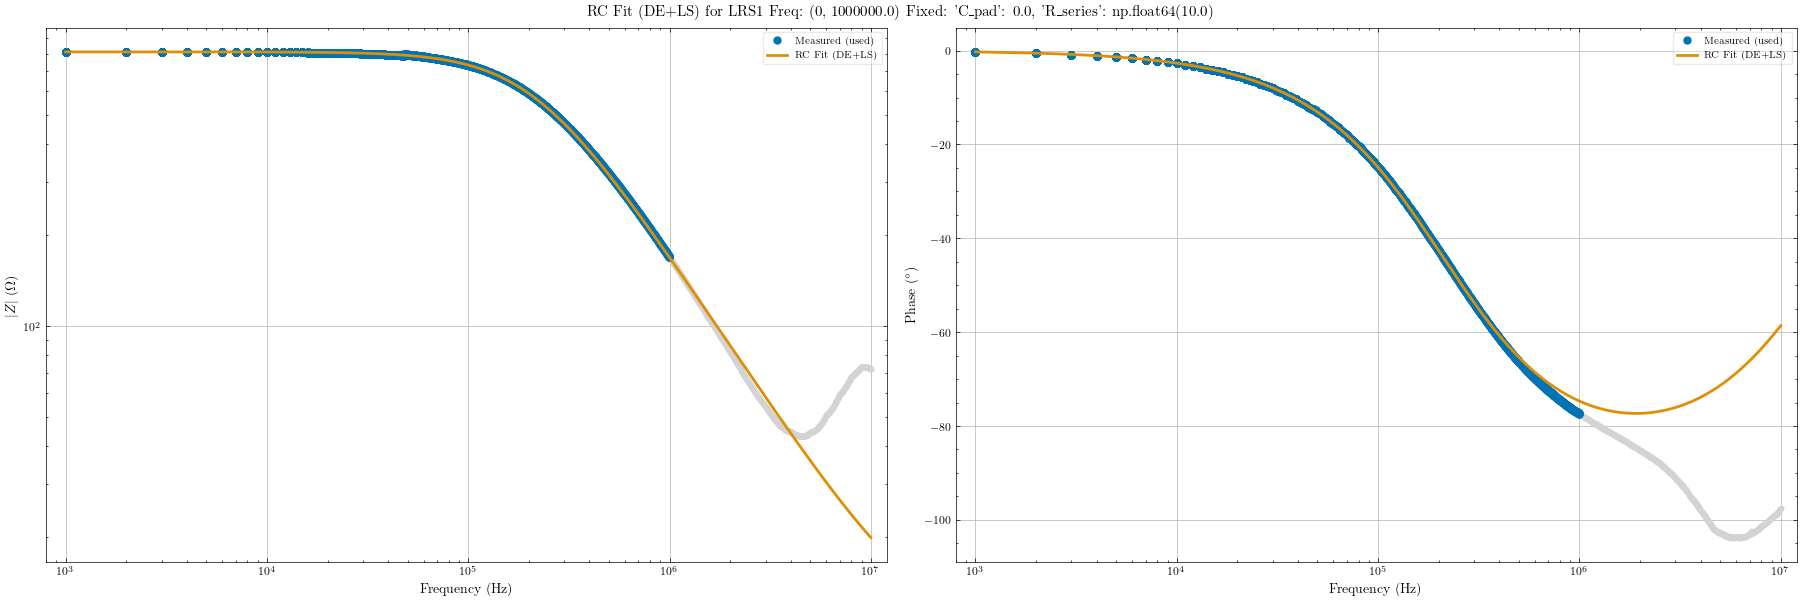


Final Fitted Parameters Dictionary:
{'C_pad': 0.0, 'R_series': np.float64(10.0), 'R_mem1': np.float64(800.2525520324707), 'C_mem1': np.float64(9.366276377792551e-10)}
--- Fit finished for: LRS1 ---

--- Starting Fit for: HRS2 ---
Using model: RC
With fixed params: {'C_pad': 0.0, 'R_series': np.float64(10.0)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'C_mem1']
3072 pts post-freq filter.
Running DE...
DE OK.
 DE Final Cost: 7.0758e-01
  DE Best:)
name R_mem1: 4.03e+03
name C_mem1: 9.49e-10

Running LS Refinement...
LS OK!
  LS Final Cost: 0.354
  Final Fitted Parameters:
    R_mem1: 4028.296
    C_mem1: 0.000
    C_pad: 0.000
    R_series: 10.000


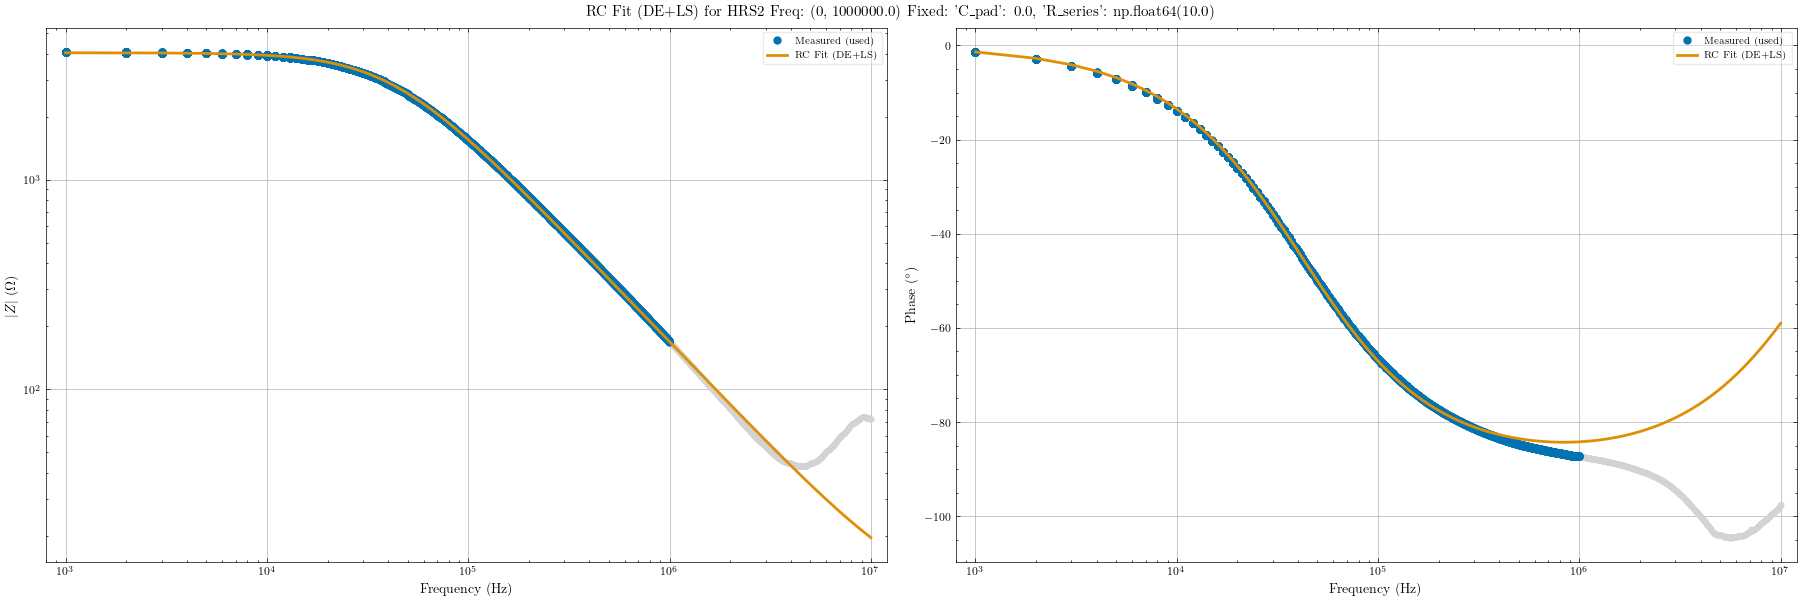


Final Fitted Parameters Dictionary:
{'C_pad': 0.0, 'R_series': np.float64(10.0), 'R_mem1': np.float64(4028.296259880066), 'C_mem1': np.float64(9.486345236313706e-10)}
--- Fit finished for: HRS2 ---


In [7]:
# Set C_pad to zero as we have no pad capacitance in this case
C_calc_pad = 0.0
# --- Settings ---
fit_settings = {
    'model_type': 'RC', # String: 'RC', 'CPE', 'RC2','CPE2, 'RC3', 'CPE3'
    'freq_bounds': (0, 1e6), # Tuple (min_freq, max_freq) for fitting range. None means no limit.
    'med_filt': 0, # Median filter kernel (or 0/None to skip)
    'fixed_params': {'C_pad': C_calc_pad, 'R_series': np.float64(10)}, #{'R_mem1': np.float64(254647.25), 'C_mem1': np.float64(1.9379283048750973e-10), 'C_pad': np.float64(1.8206090757078506e-11), 'R_series': np.float64(150.64021259132736)},#None, # Dictionary mapping parameter names (str) to fixed values.
                            # {'C_pad': 1.5e-11}, # Fix C_pad (or None to fit all)
                            #  {'C_pad': 1.2e-11, 'R_mem': 1e8} # Fix two parameters (for RC model)
    
    'use_de': True,  # If True, perform Differential Evolution before Least Squares IF False to use only Least Squares (requires good initial guess).
    'plot_fit': True, # If True, display the Bode plot of the fit after completion.
    'fig_size': fig_size, # Figure size for the plot (None to use default).
    'plot_type': 'Zabsphi', # Plot type: 'Zrealimag' or 'Zabsphi'
    # Optional: Provide specific bounds/guesses if needed - set to None to use defaults.
    'de_bounds_dict': {'R_mem1': (1e2, 1e10), 'C_mem1': (1e-11, 1e-8),'R_mem2': (1e0, 1e9), 'C_mem2': (1e-13, 1e-8), #'C_mem2': (C_calc_siox*0.5, C_calc_siox*1.5),
                     'C_pad': (1e-11, 3e-11), 'R_series': (1, 1e4), 'Q1': (1e-12, 1e-7), 'alpha1': (0.6, 1.0),
                      'Q2': (1e-13, 1e-8), 'alpha2': (0.5, 1.0)}, #'R_mem1': (1e1, 1e14),
    #'ls_bounds_dict': {'R_mem1': (1e-3, np.inf), 'C_mem1': (0, np.inf), 'R_mem2': (1e-3, np.inf), 
                        # 'C_mem2': (0, np.inf), 'C_pad': (0, np.inf), 'R_series': (0, np.inf), 'Q1': (1e-15, np.inf), 
                        # 'alpha1': (1e-3, 1.0), 'Q2': (1e-15, np.inf), 'alpha2': (1e-3, 1.0)}
                        
    # 'initial_guess_dict': {'R_mem1': 5e7, 'C_mem1': 5e-11, 'R_mem2': 1e5, 'C_mem2': 1e-9, 'C_pad': 2e-11, 'R_series': 70.0,
                             # 'Q1': 4e-11, 'alpha1': 0.92, 'Q2': 5e-10, 'alpha2': 0.85}
    'de_maxiter': 6000000, # Max generations (iterations) for Differential Evolution. Increase for complex problems.
    'ls_max_nfev': 300000, # Max function evaluations for Least Squares. Increase if refinement terminates early.
    'de_popsize':50, 
    'de_tol': 1e-5, 
    'ls_ftol':1e-13, 
    'ls_xtol':1e-13, 
    'ls_gtol':1e-13,
}

# Set the bounds for the Least Squares fit to be the same as the Differential Evolution bounds
fit_settings['ls_bounds_dict'] = fit_settings['de_bounds_dict']


# --- Run Fit ---
for run in d2:
    
    fig, ax = fit_impedance_data(run[0], **fit_settings)

    # --- Parameter for Plot Exports ---
    # Labels
    plot_labels = [''] # label for the legend
    plot_filename = '' # name for exported figure
    plot_title = 'Trial fitting' # title for powerpoint

    # Notes
    notes = [''] # notes for the powerpoint in text box

    # if export true, update the plot string
    run = update_plot_string(run, export_data=export_data, plot_labels=plot_labels)

    # append the figure and title to the list for later exporting
    fig_list.append((fig, plot_filename, plot_title, notes)) 


## Plot

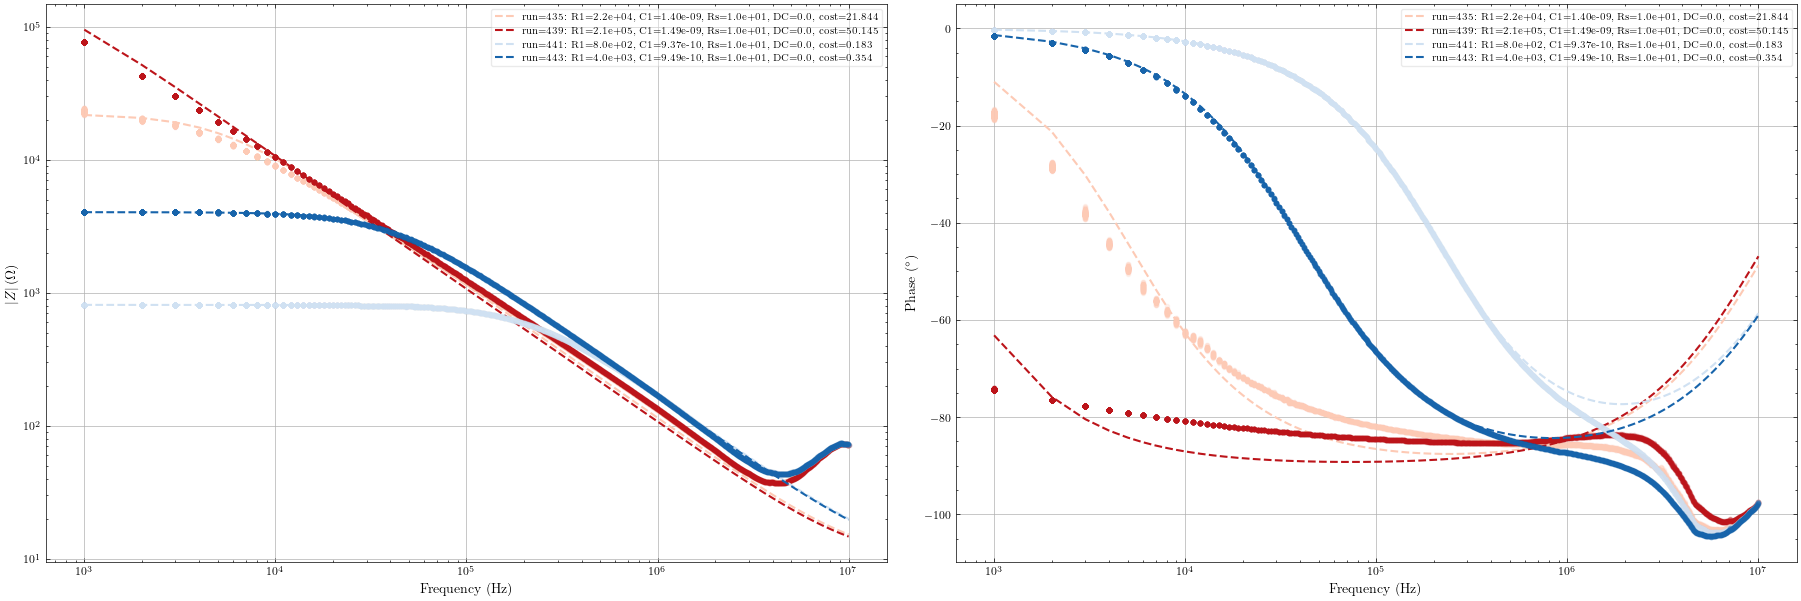

In [8]:
# Separate the data into the HRS and LRS states for plotting
d2_HRS = [keithley[435][0],  keithley[439][0]]
d2_LRS = [keithley[441][0],  keithley[443][0]]
    
# Combine the HRS and LRS data into a single list of lists
d2_combined = [d2_HRS, d2_LRS]

# Labels
plot_labels = [ 'HRS1', 'HRS2', 'LRS1', 'LRS3'] # label for the legend
plot_filename = 'Switching_fitted' # name for exported figure
plot_title = 'D2 Fitted Switching Data' # title for powerpoint

# Notes
notes = ['Expected pristine capacitance is 6.5e-10', 'LRS is lower capacitance than HRS', ''] # notes for the powerpoint in text box

# if export true, update the plot string
d2_combined = update_plot_string(d2_combined, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot_fit(d2_combined, d_type='Zabsphi', freq_lim=[1e2, 1e7], y_lim_left=None,
                    sort_data=False,  fig_size=fig_size, med_filt = 0, show_key = True)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes))

# Double RC

### Fitting


--- Starting Fit for: pristine ---
Using model: RC2
With fixed params: {'C_pad': 0.0, 'C_mem1': np.float64(1.45e-09), 'R_series': np.float64(10.0)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'R_mem2', 'C_mem2']
3072 pts post-freq filter.
Running DE...
DE OK.
 DE Final Cost: 2.3543e+01
  DE Best:)
name R_mem1: 2.24e+04
name R_mem2: 1.67e+02
name C_mem2: 5.00e-09

Running LS Refinement...
LS OK!
  LS Final Cost: 11.772
  Final Fitted Parameters:
    R_mem1: 22448.307
    C_mem1: 0.000
    R_mem2: 166.567
    C_mem2: 0.000
    C_pad: 0.000
    R_series: 10.000


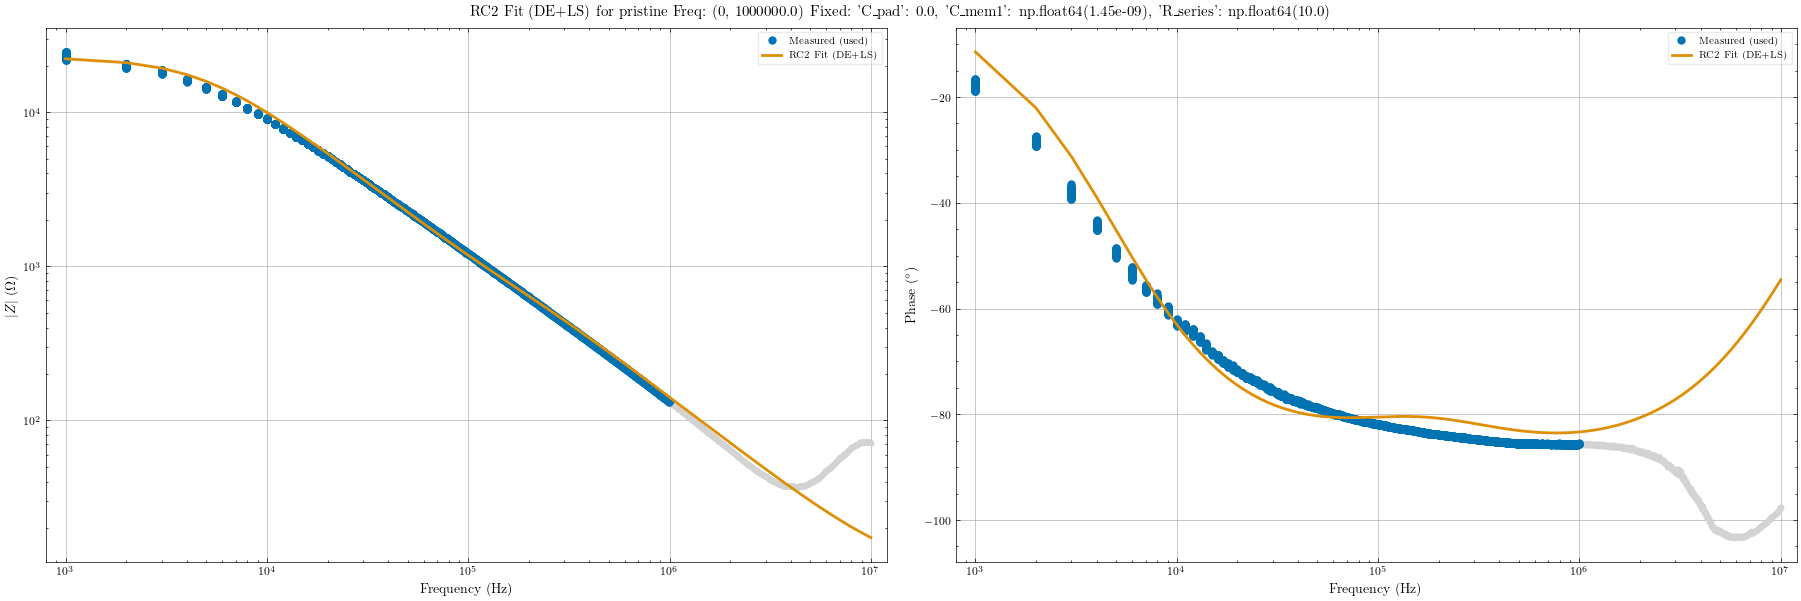


Final Fitted Parameters Dictionary:
{'C_pad': 0.0, 'C_mem1': np.float64(1.45e-09), 'R_series': np.float64(10.0), 'R_mem1': np.float64(22448.307211878593), 'R_mem2': np.float64(166.56680249794866), 'C_mem2': np.float64(4.999999999999999e-09)}
--- Fit finished for: pristine ---

--- Starting Fit for: HRS1 ---
Using model: RC2
With fixed params: {'C_pad': 0.0, 'C_mem1': np.float64(1.45e-09), 'R_series': np.float64(10.0)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'R_mem2', 'C_mem2']
3072 pts post-freq filter.
Running DE...
DE OK.
 DE Final Cost: 6.7644e+01
  DE Best:)
name R_mem1: 2.15e+05
name R_mem2: 2.87e+02
name C_mem2: 5.00e-09

Running LS Refinement...
LS OK!
  LS Final Cost: 34.050
  Final Fitted Parameters:
    R_mem1: 214948.996
    C_mem1: 0.000
    R_mem2: 282.550
    C_mem2: 0.000
    C_pad: 0.000
    R_series: 10.000


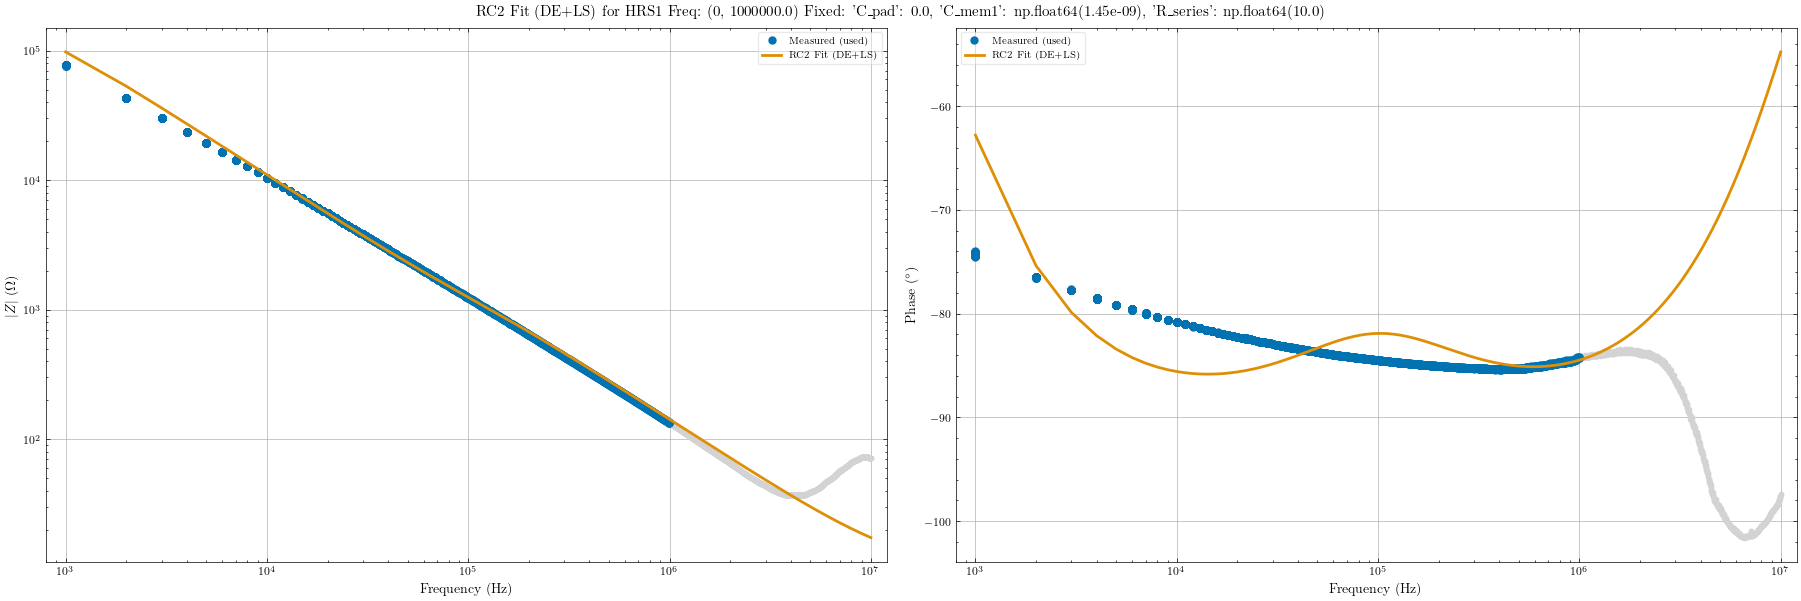


Final Fitted Parameters Dictionary:
{'C_pad': 0.0, 'C_mem1': np.float64(1.45e-09), 'R_series': np.float64(10.0), 'R_mem1': np.float64(214948.99588164975), 'R_mem2': np.float64(282.5501388798686), 'C_mem2': np.float64(4.912026528895234e-09)}
--- Fit finished for: HRS1 ---

--- Starting Fit for: LRS1 ---
Using model: RC2
With fixed params: {'C_pad': 0.0, 'C_mem1': np.float64(1.45e-09), 'R_series': np.float64(10.0)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'R_mem2', 'C_mem2']
3072 pts post-freq filter.
Running DE...
DE OK.
 DE Final Cost: 3.6611e-01
  DE Best:)
name R_mem1: 5.17e+02
name R_mem2: 2.83e+02
name C_mem2: 2.65e-09

Running LS Refinement...
LS OK!
  LS Final Cost: 0.183
  Final Fitted Parameters:
    R_mem1: 516.924
    C_mem1: 0.000
    R_mem2: 283.330
    C_mem2: 0.000
    C_pad: 0.000
    R_series: 10.000


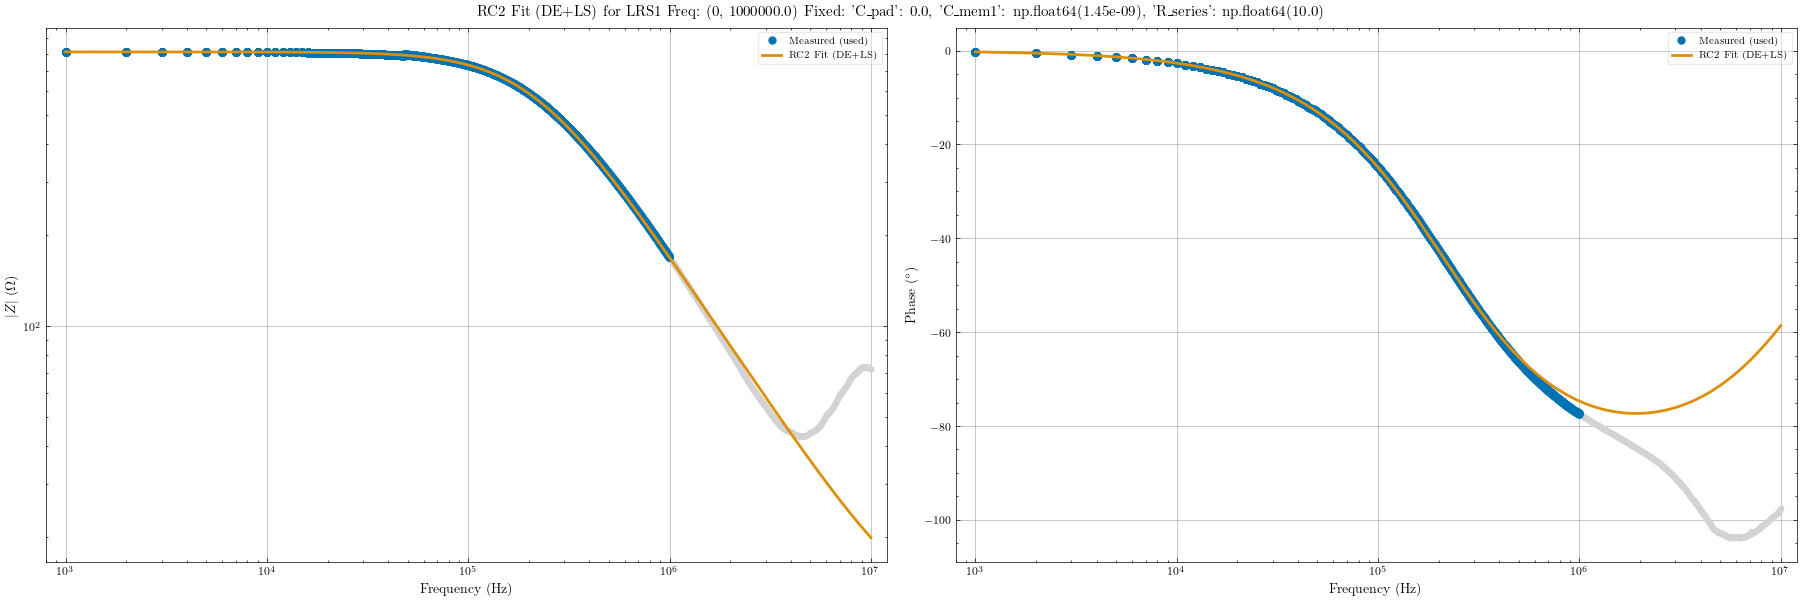


Final Fitted Parameters Dictionary:
{'C_pad': 0.0, 'C_mem1': np.float64(1.45e-09), 'R_series': np.float64(10.0), 'R_mem1': np.float64(516.9242378082126), 'R_mem2': np.float64(283.33010666351765), 'C_mem2': np.float64(2.6454644626231275e-09)}
--- Fit finished for: LRS1 ---

--- Starting Fit for: HRS2 ---
Using model: RC2
With fixed params: {'C_pad': 0.0, 'C_mem1': np.float64(1.45e-09), 'R_series': np.float64(10.0)}
Frequency range: (0, 1000000.0)
Free parameters to fit: ['R_mem1', 'R_mem2', 'C_mem2']
3072 pts post-freq filter.
Running DE...
DE OK.
 DE Final Cost: 5.5799e-01
  DE Best:)
name R_mem1: 2.29e+03
name R_mem2: 1.76e+03
name C_mem2: 2.71e-09

Running LS Refinement...
LS OK!
  LS Final Cost: 0.279
  Final Fitted Parameters:
    R_mem1: 2287.043
    C_mem1: 0.000
    R_mem2: 1758.705
    C_mem2: 0.000
    C_pad: 0.000
    R_series: 10.000


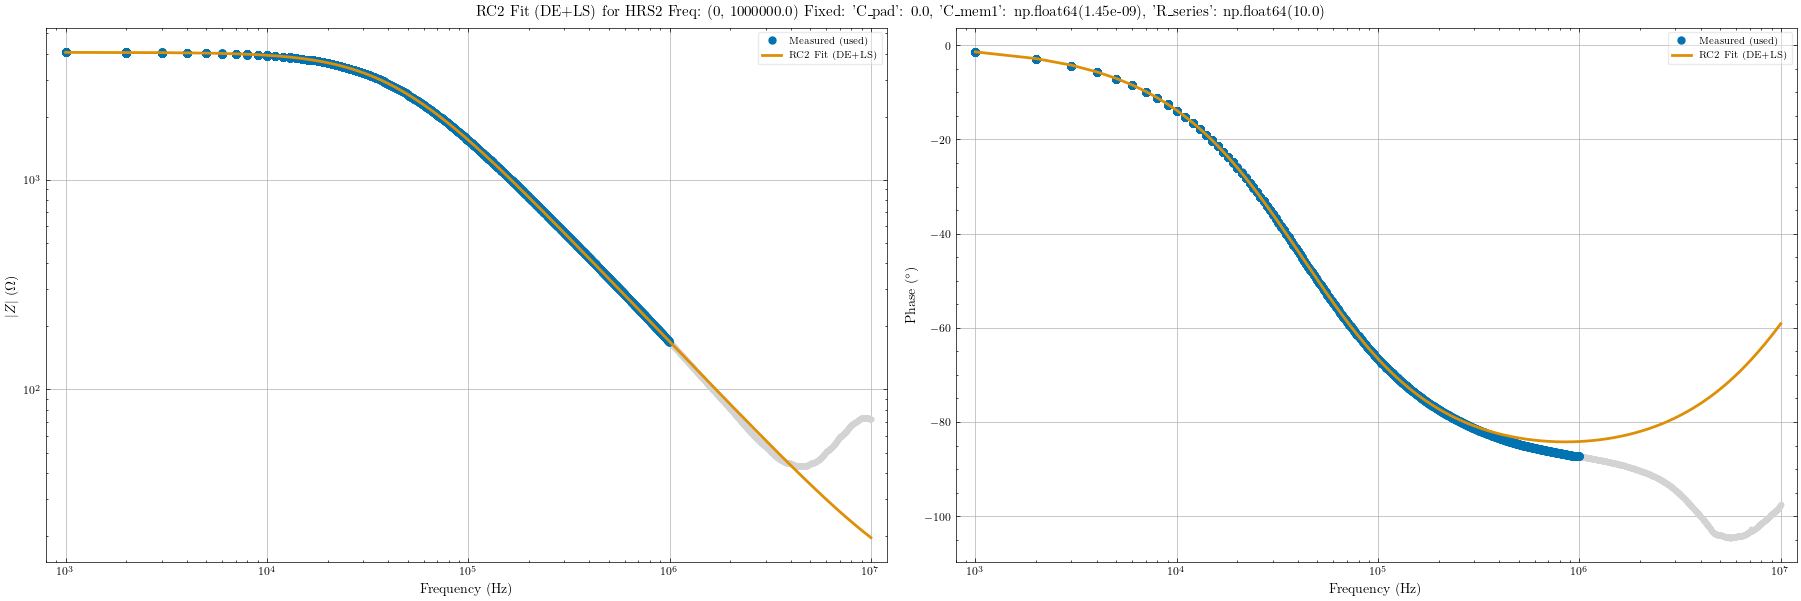


Final Fitted Parameters Dictionary:
{'C_pad': 0.0, 'C_mem1': np.float64(1.45e-09), 'R_series': np.float64(10.0), 'R_mem1': np.float64(2287.0429112389684), 'R_mem2': np.float64(1758.7052923701704), 'C_mem2': np.float64(2.706817411363267e-09)}
--- Fit finished for: HRS2 ---


In [19]:
# Set C_pad to zero as we have no pad capacitance in this case
C_calc_pad = 0.0
# --- Settings ---
fit_settings = {
    'model_type': 'RC2', # String: 'RC', 'CPE', 'RC2','CPE2, 'RC3', 'CPE3'
    'freq_bounds': (0, 1e6), # Tuple (min_freq, max_freq) for fitting range. None means no limit.
    'med_filt': 0, # Median filter kernel (or 0/None to skip)
    'fixed_params': {'C_pad': C_calc_pad, 'C_mem1': np.float64(1.45e-9), 'R_series': np.float64(10)}, #{'R_mem1': np.float64(254647.25), 'C_mem1': np.float64(1.9379283048750973e-10), 'C_pad': np.float64(1.8206090757078506e-11), 'R_series': np.float64(150.64021259132736)},#None, # Dictionary mapping parameter names (str) to fixed values.
                            # {'C_pad': 1.5e-11}, # Fix C_pad (or None to fit all)
                            #  {'C_pad': 1.2e-11, 'R_mem': 1e8} # Fix two parameters (for RC model)
    
    'use_de': True,  # If True, perform Differential Evolution before Least Squares IF False to use only Least Squares (requires good initial guess).
    'plot_fit': True, # If True, display the Bode plot of the fit after completion.
    'fig_size': fig_size, # Figure size for the plot (None to use default).
    'plot_type': 'Zabsphi', # Plot type: 'Zrealimag' or 'Zabsphi'
    # Optional: Provide specific bounds/guesses if needed - set to None to use defaults.
    'de_bounds_dict': {'R_mem1': (1e2, 1e7), 'C_mem1': (1e-11, 5e-9),'R_mem2': (1e0, 1e7), 'C_mem2': (1e-11, 5e-9), #'C_mem2': (C_calc_siox*0.5, C_calc_siox*1.5),
                     'C_pad': (1e-11, 3e-11), 'R_series': (1, 1e4), 'Q1': (1e-12, 1e-7), 'alpha1': (0.6, 1.0),
                      'Q2': (1e-13, 1e-8), 'alpha2': (0.5, 1.0)}, #'R_mem1': (1e1, 1e14),
    #'ls_bounds_dict': {'R_mem1': (1e-3, np.inf), 'C_mem1': (0, np.inf), 'R_mem2': (1e-3, np.inf), 
                        # 'C_mem2': (0, np.inf), 'C_pad': (0, np.inf), 'R_series': (0, np.inf), 'Q1': (1e-15, np.inf), 
                        # 'alpha1': (1e-3, 1.0), 'Q2': (1e-15, np.inf), 'alpha2': (1e-3, 1.0)}
                        
    # 'initial_guess_dict': {'R_mem1': 5e7, 'C_mem1': 5e-11, 'R_mem2': 1e5, 'C_mem2': 1e-9, 'C_pad': 2e-11, 'R_series': 70.0,
                             # 'Q1': 4e-11, 'alpha1': 0.92, 'Q2': 5e-10, 'alpha2': 0.85}
    'de_maxiter': 6000000, # Max generations (iterations) for Differential Evolution. Increase for complex problems.
    'ls_max_nfev': 300000, # Max function evaluations for Least Squares. Increase if refinement terminates early.
    'de_popsize':100, 
    'de_tol': 1e-5, 
    'ls_ftol':1e-13, 
    'ls_xtol':1e-13, 
    'ls_gtol':1e-13,
}

# Set the bounds for the Least Squares fit to be the same as the Differential Evolution bounds
fit_settings['ls_bounds_dict'] = fit_settings['de_bounds_dict']


# --- Run Fit ---
for run in d2:
    
    fig, ax = fit_impedance_data(run[0], **fit_settings)

    # --- Parameter for Plot Exports ---
    # Labels
    plot_labels = [''] # label for the legend
    plot_filename = '' # name for exported figure
    plot_title = 'Trial fitting' # title for powerpoint

    # Notes
    notes = [''] # notes for the powerpoint in text box

    # if export true, update the plot string
    run = update_plot_string(run, export_data=export_data, plot_labels=plot_labels)

    # append the figure and title to the list for later exporting
    fig_list.append((fig, plot_filename, plot_title, notes)) 


### Plotting

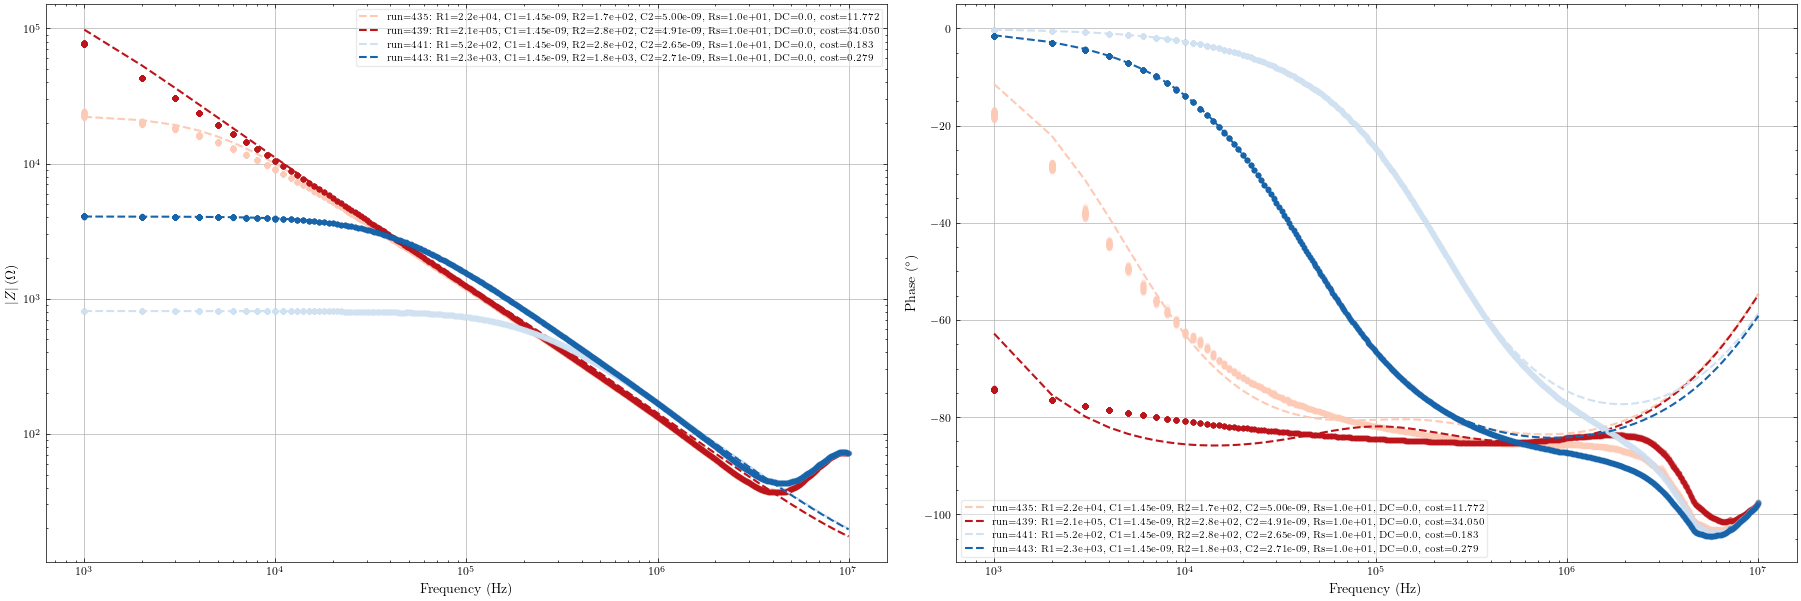

In [20]:
# Separate the data into the HRS and LRS states for plotting
d2_HRS = [keithley[435][0],  keithley[439][0]]
d2_LRS = [keithley[441][0],  keithley[443][0]]
    
# Combine the HRS and LRS data into a single list of lists
d2_combined = [d2_HRS, d2_LRS]

# Labels
plot_labels = [ 'HRS1', 'HRS2', 'LRS1', 'LRS3'] # label for the legend
plot_filename = 'Switching_fitted_RC' # name for exported figure
plot_title = 'D2 Fitted Switching Data Single RC' # title for powerpoint

# Notes
notes = ['Expected pristine capacitance is 6.5e-10', 'LRS is lower capacitance than HRS', 'more CPE behavior in pristine/HRS state'] # notes for the powerpoint in text box

# if export true, update the plot string
d2_combined = update_plot_string(d2_combined, export_data=export_data, plot_labels=plot_labels)

# Plot
fig, ax = IS_plot_fit(d2_combined, d_type='Zabsphi', freq_lim=[1e2, 1e7], y_lim_left=None,
                    sort_data=False,  fig_size=fig_size, med_filt = 0, show_key = True)

# append the figure and title to the list for later exporting
fig_list.append((fig, plot_filename, plot_title, notes))

In [11]:
cost = 1.7e-2
print("Cost of fit: {:.2f}".format(cost))

Cost of fit: 0.02


# Debye Fitting

In [12]:
# --- Example Call ---

# --- Define C_0 (Geometric Capacitance) ---
# You MUST calculate this based on your sample geometry
# Example: Area = (1e-3)**2 * np.pi, thickness = 0.5e-3 # Meters
# C_0 = epsilon_0 * Area / thickness
# Replace with your actual value:
sample_C_0 = epsilon_0 * (20e-6)**2 / (25e-9) # Example: 200um x 200um area, 25nm thickness

# --- Choose Data ---
try:
    data_to_fit = solatron[79][0]
    data_available = True
    if data_to_fit.Zrealimag is None: raise ValueError("Missing Zrealimag")
except Exception as e:
     print(f"Error loading data: {e}")
     data_available = False

if data_available:
    # --- Define Settings for Dielectric Fit ---
    num_relax = 3 # Choose 1, 2, or 3

    # Define bounds ONLY for parameters used in the 2-relaxation model
    specific_de_bounds = {
       'eps_inf': (1.0, 50.0),
       'delta_eps1': (1e-1, 1e4), 'tau1': (1e-7, 1e-1), # Slower process
       'delta_eps2': (1e-1, 1e3), 'tau2': (1e-10, 1e-5), # Faster process
       'sigma_dc': (0, 1e-3)
    }
    specific_ls_bounds = {
       'eps_inf': (1.0, np.inf),
       'delta_eps1': (0, np.inf), 'tau1': (1e-12, np.inf),
       'delta_eps2': (0, np.inf), 'tau2': (1e-13, np.inf),
       'sigma_dc': (0, np.inf)
    }
    # Optional initial guess
    # specific_initial_guess = {
    #    'eps_inf': 5.0, 'delta_eps1': 100, 'tau1': 1e-4,
    #    'delta_eps2': 10, 'tau2': 1e-7, 'sigma_dc': 1e-8
    # }

    # Assemble the settings dictionary
    fit_settings = {
        'n_relaxations': num_relax,
        'C_0': sample_C_0,              # Pass C_0
        'C_pad_to_subtract': C_calc_pad, # Pass C_pad
        'freq_bounds': (1e0, 1e6),      # Example range
        'med_filt': 0,
        'fixed_params': {'eps_inf': 2.2}, #None,           # Example: {'sigma_dc': 0}
        'plot_fit': True,
        'plot_type': 'Zabsphi',
        'fig_size': fig_size,
        'use_de': True,
        'de_bounds_dict': specific_de_bounds,
        'ls_bounds_dict': specific_ls_bounds,
        'initial_guess_dict': None, # specific_initial_guess,
        'de_maxiter': 700,
        'ls_max_nfev': 5000,
        # Optional stricter LS tolerances
        # 'ls_ftol': 1e-12, 'ls_xtol': 1e-12, 'ls_gtol': 1e-12
    }

    # --- Run Fit ---
    print(f"\n*** Running fit with settings: ***\n{fit_settings}\n")
    
    # fig, ax, a , b = fit_impedance_dielectric(data_to_fit, **fit_settings)


Error loading data: name 'solatron' is not defined


In [13]:
25e-9/((20e-6)**2 *2.46e-4)
print( 9e-9 *25e-9/((20e-6)**2 *epsilon_0))

63529.25999668198


# Exporting

### Exporting All Figures as Individual Files

In [14]:
if export_data:
    for fig_obj, fig_name, fig_title, notes in fig_list:
        save_path = Path(output_IS_solatron) / Path(f"{fig_name}_{powerpoint_string}.{fig_format}")
        fig_obj.savefig(save_path, dpi=600, bbox_inches='tight', transparent=plot_transparency)

### Exporting to Powerpoint

In [15]:
if export_data == True:
    # Create a PowerPoint presentation object
    prs = Presentation()
    [prs.slide_width, prs.slide_height] = [Inches(13.333), Inches(7.5)]
   
    # define the path to the output directory
    path_out = output_IS_solatron

    # Add each figure to the PowerPoint presentation if it exists
    for fig, fig_name, title, notes in fig_list:
        add_slide(fig, title, notes, prs, path_out = path_out, layout = 'vertical')

    # Save the PowerPoint presentation
    prs.save(Path(path_out) / Path(f'{powerpoint_string}.pptx'))